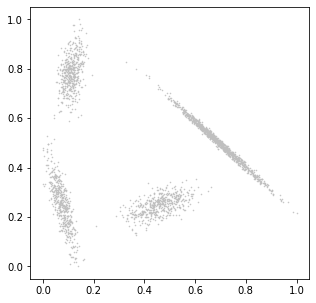

In [21]:
import numpy as np 
import numpy.matlib 
import matplotlib.pyplot as plt
from matplotlib import colors

# np.random.rand = uniform random generation, [0, 1]
# np.random.randn = normal random generation, N(0, 1)
r1 = 10*(np.random.rand(2,2) - 0.5) # [-1, 1]
r2 = 10*(np.random.rand(2,2) - 0.5) # [-1, 1]
r3 = 10*(np.random.rand(2,2) - 0.5) # [-1, 1]
r4 = 10*(np.random.rand(2,2) - 0.5) # [-1, 1]

t1 = 50*(np.random.rand(2) - 0.5)
t2 = 50*(np.random.rand(2) - 0.5)
t3 = 50*(np.random.rand(2) - 0.5)
t4 = 50*(np.random.rand(2) - 0.5)

X1 = np.random.randn(1000,2)
X1 = X1.dot(r1) + t1

X2 = np.random.randn(500,2)
X2 = X2.dot(r2) + t2

X3 = np.random.randn(500,2)
X3 = X3.dot(r3) + t3

X4 = np.random.randn(500,2)
X4 = X4.dot(r4) + t4

# unlabel data
X = np.vstack((X1, X2, X3, X4))

# normalization, [0, 1]
Xmin = np.min(X, axis = 0)
Xmax = np.max(X, axis = 0)
X = (X - Xmin) / (Xmax - Xmin)

plt.figure(figsize = (5,5))
plt.plot(X[:,0],X[:,1],".",markersize = 1, color = [0.75, 0.75, 0.75])

N,D = X.shape

# 2차원 샘플 생성

<ipython-input-22-28e701e803ee>:24: RuntimeWarning: Mean of empty slice
  mu[:,k] = np.nanmean( X[label == k,:], axis = 0)


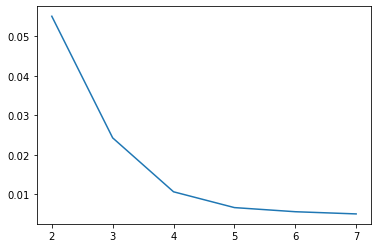

In [22]:
#  MU  중심 개수 
# 차원
def computeDistance2(samples, point):
    N,D = samples.shape
    D, = point.shape 
    dist2 = np.sum( (samples - np.matlib.repmat(point.reshape(1,-1),N,1))**2, axis = 1)
    
    return dist2.reshape(-1)

inertia = np.zeros(20)
inertia[:] = np.nan

for K in range(2, 8):
    dist2 = np.zeros((N,K))
    dist2[:] = np.nan
    
    while (np.sum(np.isnan(dist2)) > 0):  # dist에 nan값 없어야됨
        mu = np.random.rand(D,K)
        iterMax = 10
        for iter in range(iterMax):# kmeans 알고리즘
            for k in range(K):
                dist2[:,k] = computeDistance2(X, mu[:,k])
            label = np.argmin(dist2, axis = 1)

            for k in range(K):
                mu[:,k] = np.nanmean( X[label == k,:], axis = 0)            

    inertia[K] = np.mean( np.min(dist2, axis = 1) )
    
plt.figure()
plt.plot(inertia)

<ipython-input-36-43452f8012be>:27: RuntimeWarning: Mean of empty slice
  mu[:,k] = np.nanmean( X[label == k,:], axis = 0)
<ipython-input-36-43452f8012be>:27: RuntimeWarning: Mean of empty slice
  mu[:,k] = np.nanmean( X[label == k,:], axis = 0)


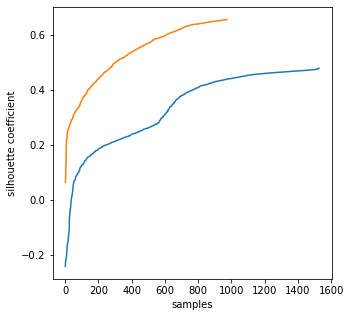

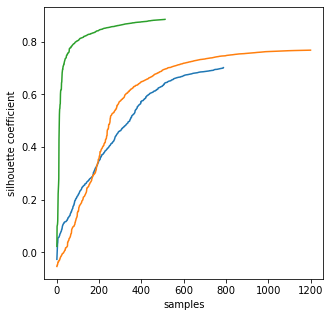

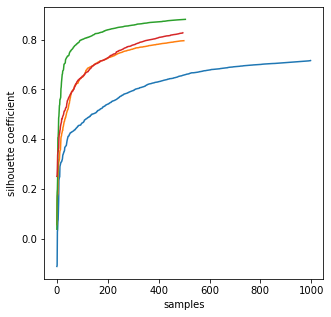

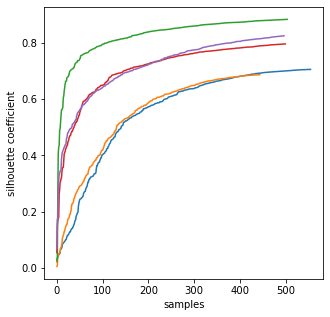

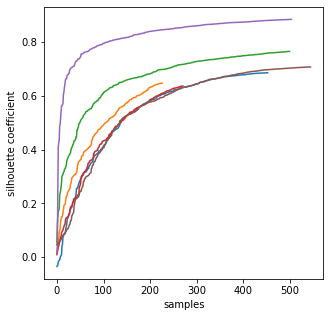

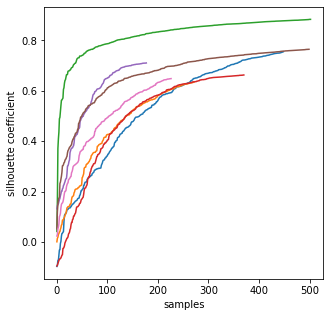

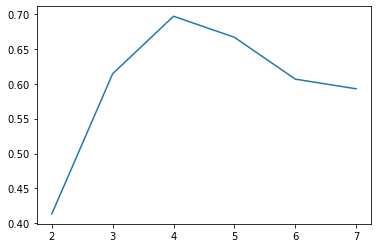

In [36]:
def computeDistance2(samples, point):
    N,D = samples.shape
    D, = point.shape
    dist2 = np.sum( (samples - np.matlib.repmat(point.reshape(1,-1),N,1))**2, axis = 1)
    
    return dist2.reshape(-1)
#  MU  중심 개수 
# 차원
inertia = np.zeros(20)
inertia[:] = np.nan

s_score = np.zeros(20)
s_score[:] = np.nan

# K = 중심 개수
for K in range(2, 8):
    dist2 = np.zeros((N,K))
    dist2[:] = np.nan
    
    while (np.sum(np.isnan(dist2)) > 0):
        mu = np.random.rand(D,K)
        iterMax = 10
        for iter in range(iterMax): # kmeans 알고리즘
            for k in range(K):
                dist2[:,k] = computeDistance2(X, mu[:,k])
            label = np.argmin(dist2, axis = 1)

            for k in range(K):
                mu[:,k] = np.nanmean( X[label == k,:], axis = 0)            

    s_coeff = np.zeros(N)
    a = np.zeros(N) # intra-cluster distance
    b = np.zeros(N) # nearest-cluster distance
    
    for n in range(N):
        # 우리가 속한 cluster의 index (intra)
        # 그 index에 해당되는 sample들을 추림
        # 그 샘플들이랑, 나 = x[n,:]랑 거리를 구해요
        # 그 거리들의 평균을 냅니다 (a[n])
        
        # x1 -> 1번째 중심       label = 1, 1, 3 ,,
        # x2 -> 1번째 중심
        # x3 -> 3번째 중심
        # ...
        label_intra = label[n]
        mask_intra = (label == label_intra)   # 일치하는 인덱스 모두 반환, 나랑 같은 cluster에 속한 애들
        a[n] = np.mean(np.sqrt(computeDistance2(X[mask_intra,:], X[n,:])))
        
        
        
        # 나랑 제일 가까운 cluster의 index (nearest)
        # 그 index에 해당되는 sample들을 추림
        # 그 샘플들이랑, 나 = x[n,:]랑 거리를 구해요
        # 그 거리들의 평균을 냅니다 (b[n])
        dist2_sort = np.sort(dist2[n,:]) #dist2[n,:] : n번째 sample이랑 k개의 cluster들의 거리 
        label_nearest = np.where(dist2[n,:] == dist2_sort[1])[0]
        # np.where은 [0] 작성해야 됨 그냥은 이중리스트 처리된대
        # 두번째로 가까운 cluster 인덱스 반환
        mask_nearest = (label == label_nearest)
        # 해당 인덱스 가지는 값 모두 반환
        b[n] = np.mean(np.sqrt(computeDistance2(X[mask_nearest,:], X[n,:])))
        # 두번째로 가까운 cluster에 들어있는 sample들 하고 나 하고 거리 계산
        # s_coeff[n] = (b[n] - a[n]) / max([a[n], b[n]])
        s_coeff[n] = (b[n] - a[n]) / np.max([a[n], b[n]])
        
    s_score[K] = np.nanmean(s_coeff)
     
    
    plt.figure(figsize = (5,5))
    for k in range(0,K):
        plt.plot(np.sort(s_coeff[label == k])) 
    plt.xlabel('samples')
    plt.ylabel('silhouette coefficient')
    
        
plt.figure()
plt.plot(s_score)